# Chapter 1 Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz
import pandas as pd

az.style.use('arviz-white')

## Exercise 1
***

*Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.*

1. *What is the sample space for this experiment?
1. *We define event $A$ as the jelly bean drawn is strawberry-flavored and event $B$ as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events $A$ and $B$?*
1. *Are events $A$ and $B$ mutually exclusive? Why or why not?*

<br>

1 )

The sample space for this experiment consists of all possible outcomes when drawing one jelly bean from the jar:

$$S = \{\text{Strawberry}, \text{Strawberry}, \text{Blueberry}, \text{Cinnamon}\}$$

2 ) 

Event $A$: "The Jelly bean drawn is strawberry-flavored."

We have a total of 4 jellies, and 2 are strawberry-flavored, thus we have:

$$P(A)=\frac{2}{4}=\frac{1}{2}​$$


Event $B$: Jelly bean drawn is not cinnamon-flavored.

We have a total of 4 jellies, only one is cinnamon-flavored, and then 3 are non-cinnamon-flavored. 


$$P(B)=\frac{3}{4}$$​

3 )

Mutually exclusive means that two or more events cannot happen simultaneously. In our example event $A$ is "The Jelly bean is strawberry-flavored." and event $B$ is "The Jelly bean is not cinnamon-flavored". Being strawberry-flavored satisfies the condition of not being cinnamon-flavored, so we can conclude that $A$ and $B$ can happen simultaneously.

## Exercise 2
***

*Previously, we defined a Python function `P` to compute the probability of an event using the naive definition of probability.*

*Generalize that function to compute the probability of events when they are not all equally likely. Use this new function to
compute the probability of events $A$ and $B$ from the previous exercise.*

*Hint: you can pass a third argument with the probability of each event.*

In [2]:
def P(S, A, prob_dist):
    if set(A).issubset(set(S)):
        return sum([prob_dist[event] for event in A])
    else:
        return 0


S = {"s", "b", "c"}
A = {"s"}
B = {"s", "b"}
prob_dist = {"s": 0.5, "b": 0.25, "c": 0.25}

In [3]:
P(S, A, prob_dist)

0.5

In [4]:
P(S, B, prob_dist)

0.75

## Exercise 3
***

*Use PreliZ to explore different parameters for the BetaBinomial and Gaussian distributions. Use the methods plot_pdf, plot_cdf, and plot_interactive.*

This is an open question, explore freely. Here you have just two examples.

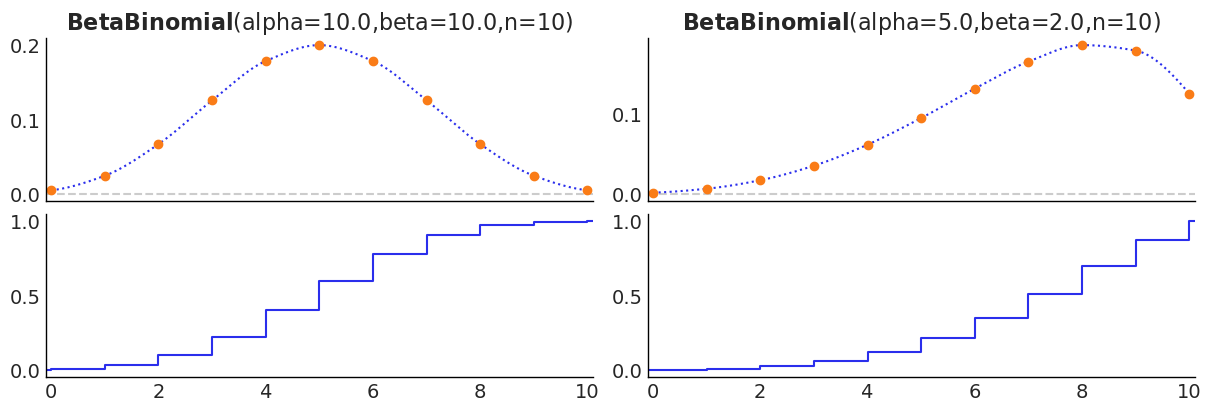

In [5]:
_, ax = plt.subplots(2, 2, figsize=(12, 4), sharex=True)
alphas = [10, 5]
betas = [10, 2]
for idx, (alpha, beta) in enumerate(zip(alphas, betas)):
    pz.BetaBinomial(alpha=alpha, beta=beta, n=10).plot_pdf(legend="title", ax=ax[0, idx]);
    pz.BetaBinomial(alpha=alpha, beta=beta, n=10).plot_cdf(legend=None, ax=ax[1, idx]);

In [6]:
pz.Normal().plot_interactive(xy_lim=(None, None, 0, 1.5))

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

## Exercise 4
***

*We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf.*

*Using the plot_ppf method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions.*

Here you have an example of the normal. Try yourself for the BetaBinomial

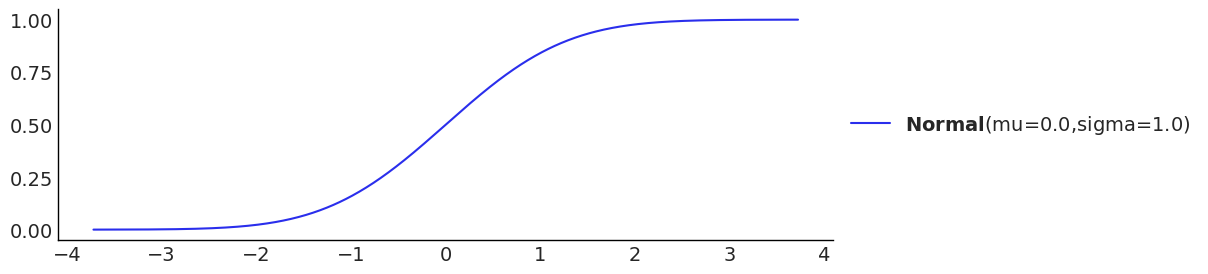

In [7]:
pz.Normal(0, 1).plot_cdf(figsize=(10, 3));

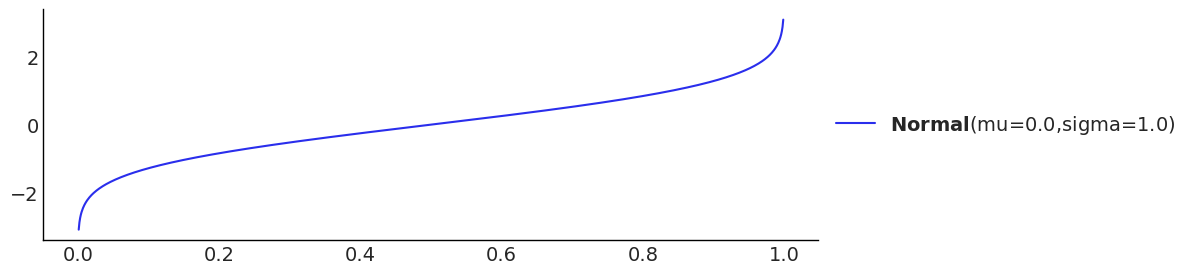

In [8]:
pz.Normal(0, 1).plot_ppf(figsize=(10, 3));

*Can you explain how the ppf is related to the cdf and pmf/pdf?*

The ppf is the inverse of the cdf. We can see that the previous point, but maybe it is easier to see if we first compute the cdf for a given value $x$ and use the result as input of the ppf function. 

x = ppf(cdf(x))

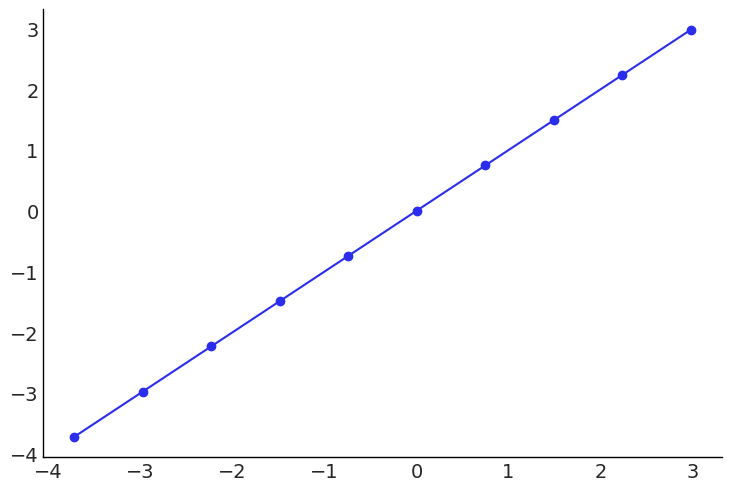

In [9]:
dist = pz.Normal(0, 1)

# we ask preliz for values on the support of the distribution
# we just take every other 100th, i.e. 10 values.
x_values = dist.xvals("full")[::100]
# compute the cdf for all these values
# Notice these operations are vectorized
cdf_v = dist.cdf(x_values)
ppf_v = dist.ppf(cdf_v)
plt.plot(x_values, ppf_v, "-o");

## Exercise 5
***


*From the following expressions, which one corresponds to the sentence "the probability of being sunny, given that it is the 9th of July of 1816"?*

- p(sunny)
- p(sunny | July)
- p(sunny | 9th of July of 1816)
- p(9th of July of 1816 | sunny)
- p(sunny, 9th of July of 1816) / p(9th of July of 1816)


There are two statements that correspond to the *Probability of being sunny given that it is the 9th of July of 1816*

1. p(sunny | 9th of July of 1816)
2. p(sunny, 9th of July of 1816) / p(9th of July of 1816)

For the second one recall the product rule

$$ p(A,B) = p(A|B)p(B) $$

A rearrangement of this formula yields

$$ p(A|B) = \frac{p(A, B)}{p(B)}$$

Replace A and B with "sunny" and "9th of July of 1816" to get the equivalent formulation.

## Exercise 6
***

*Show that the probability of choosing a human at random and picking the Pope is not the same as the probability of the Pope being human.*

Let's assume there are 6 billion humans in the galaxy and there is only 1 Pope, Pope Francis, at the time of this writing. If a human is randomly picked the chances of that human being the pope are 1 in 6 billion. In mathematical notation

$$ p(\text{Pope} | \text{human}) = \frac{1}{6,000,000, 000} $$

Additionally I am very confident that the Pope is human, so much so that I make this statement. *Given a pope, I am 100% certain they are human*.   
Written in math
$$ p(\text{human} | \text{Pope}) = 1 $$

*In the animated series Futurama, the (space) Pope is a reptile. How does this change your previous calculations?*

Ok then:

$$ p(\text{Pope} | \text{human}) = 0 $$

And 

$$ p(\text{human} | \text{Pope}) = 0 $$

## Exercise 7
***

*Following the example in Figure 1.9, use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes, like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. What do you observe?* 

There are many ways to approach this question. Here I show a visual way.

First, let's plot a given SkewNormal. We can then change the parameters and evaluate how that affects the results. Here I am using the cdf, you should also try with the pdf.

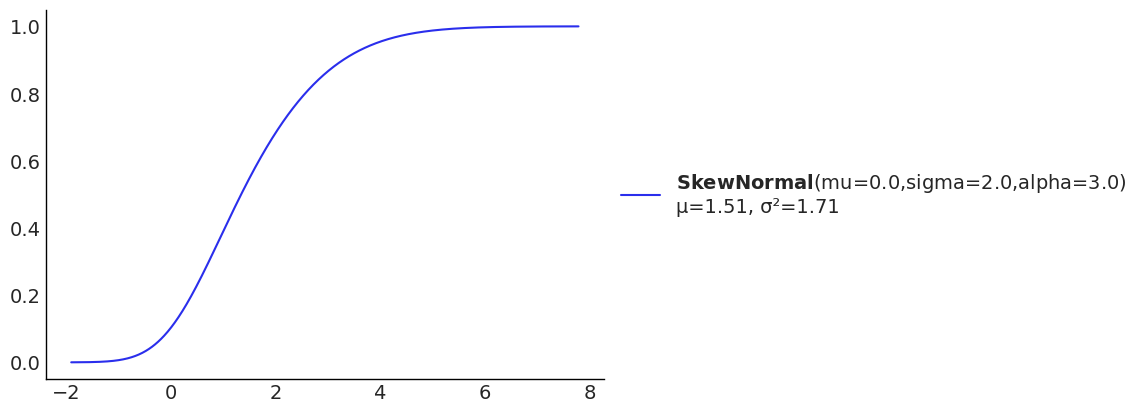

In [10]:
skn = pz.SkewNormal(0, 2, 3)

skn.plot_cdf(moments=["m", "v"]);

Now we are going to compare the moments of the distribution with the empirical mean and variance computed from 500 random samples from the above distribution. We are going to repeat this procedure for 3 sample sizes.

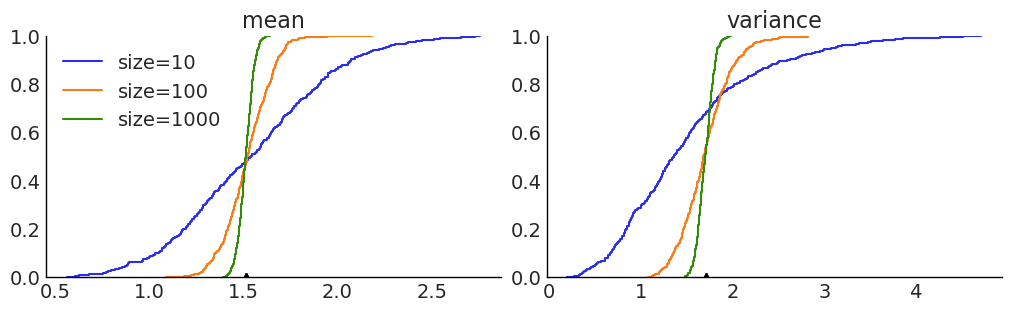

In [11]:
sizes = [10, 100, 1000]
_, ax = plt.subplots(1, 2, figsize=(10, 3))

true_mean, true_var = skn.rv_frozen.stats("mv")
for idx, size in enumerate(sizes):
    rnd = skn.rvs((size, 500))
    ax[0].ecdf(rnd.mean(0), color=f"C{idx}", label=f"{size=}")
    ax[1].ecdf(rnd.var(0), color=f"C{idx}", )
    ax[0].plot(true_mean, 0, "k^")
    ax[1].plot(true_var, 0, "k^")
    ax[0].set_title("mean")
    ax[1].set_title("variance")

ax[0].legend();

We notice that as we increase the sample size, our estimates become closer to the real value and the uncertainty decreases.

## Exercise 8
***

Repeat the previous exercise for the Student’s t-distribution. Try values of 𝜈 like 2, 3, 500. What do you observe?

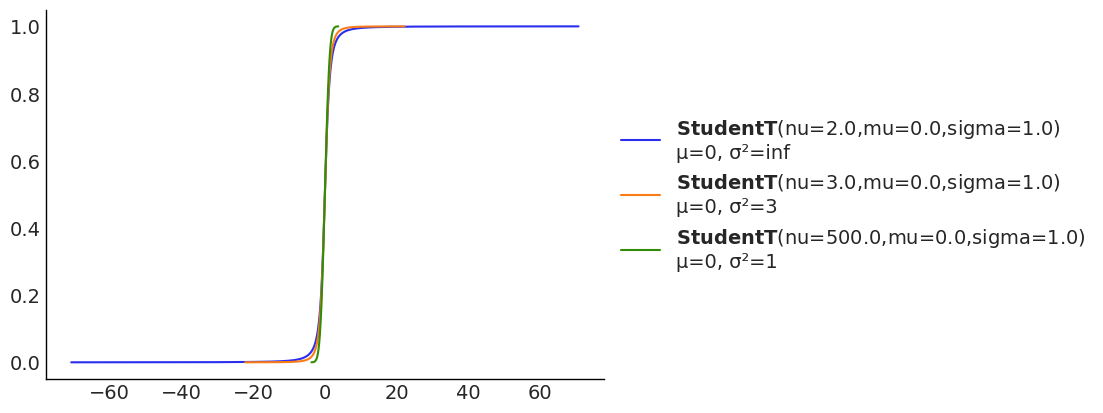

In [12]:
t_2 = pz.StudentT(2, 0, 1)
t_3 = pz.StudentT(3, 0, 1)
t_500 = pz.StudentT(500, 0, 1)

t_2.plot_cdf(moments=["m", "v"]);
t_3.plot_cdf(moments=["m", "v"]);
t_500.plot_cdf(moments=["m", "v"]);

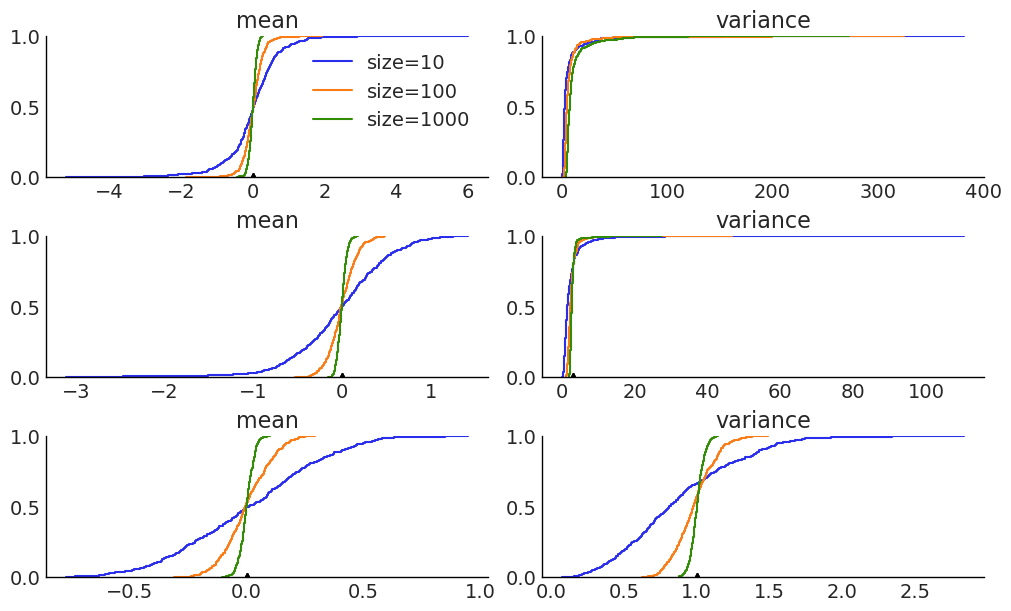

In [13]:
sizes = [10, 100, 1000]
_, ax = plt.subplots(3, 2, figsize=(10, 6))

for idx, dist in enumerate([t_2, t_3, t_500]):
    true_mean, true_var = dist.rv_frozen.stats("mv")
    for jdx, size in enumerate(sizes):
        rnd = dist.rvs((size, 500))
        ax[idx, 0].ecdf(rnd.mean(0), color=f"C{jdx}", label=f"{size=}")
        ax[idx, 1].ecdf(rnd.var(0), color=f"C{jdx}", )
        ax[idx, 0].plot(true_mean, 0, "k^")
        ax[idx, 1].plot(true_var, 0, "k^")
        ax[idx, 0].set_title("mean")
        ax[idx, 1].set_title("variance")

ax[0, 0].legend();

For the mean we see the same as with the SkewNormal.

But for the variance, the story is different.

* For Student t-distribution with $\nu=2$ the variance is infinite (notice the missing triangle on the first row, second column). From this plot, it does not seem that we can get a better approximation of the variance, by increasing the sample size. Essentially we can compute a value for the empirical variance, but the computed value is not "stable", it keeps changing.
For Student t-distribution with $>=2$ we can see that the variance is defined and "better behaved" as we increase the value of $\nu$.

## Exercise 9
***

*In the following definition of a probabilistic model, identify the prior and the likelihood:*

\begin{align}
y_i \sim& \text{Normal}(\mu, \sigma) \\
\mu \sim& \text{Normal}(0,10) \\
\sigma \sim& \text{HalfNormal}(25) 
\end{align}

The priors in the model are

\begin{align}
\mu \sim& \text{Normal}(0,10) \\
\sigma \sim& \text{HalfNormal}(25) 
\end{align}

The likelihood in our model is  
$$ y_i \sim Normal(\mu, \sigma) $$

## Exercise 10
***

*In the previous model, how many parameters will the posterior have? Compare it with the model for the coin-flipping problem.*

In the previous question there are two parameters in the posterior, $\mu$ and $\sigma$. 

In our coin flipping model we had one parameter, $\theta$. This is the only unknow. 

## Exercise 11
***

*Write Bayes' theorem for the model in Exercise 9.*

$$ p(\mu, \sigma \mid y) = \frac{p(y \mid \mu, \sigma) \quad p(\mu) \; p(\sigma)}{p(y)} $$

## Exercise 12
***

*Let's suppose that we have two coins. When we toss the first coin, half the time it lands on tails and the other half on heads. The other coin is a loaded coin that always lands on heads. If we take one of the coins at random and get heads, what is the probability that this coin is the unfair one?*

Formalizing some of the statements into mathematical notation:

The probability of picking a coin at random, and getting either the biased or fair coin is the same:

$$p(Biased) = p(Fair) = .5$$

The probability of getting heads with the biased coin is 1,
$$p(Heads | Biased) = 1$$

The probability of getting heads with the fair coin is .5
$$p(Heads | Fair) = .5$$

Lastly, remember that after picking a coin at *random*, we observed heads. Therefore we can use Bayes rule to calculate the probability that we picked the biased coin:

$$ p(Biased | Heads) = \frac{p(Heads | Biased) p(Biased)}{p(Heads)} $$

To solve this by hand we need to rewrite the denominator using the *Rule of Total Probability*:

$$ p(Biased | Heads) = \frac{p(Heads | Biased) p(Biased)}{p(Heads|Fair)*p(Fair) + p(Heads|Biased)*p(Biased)} $$

We can use Python to do the math for us:

In [14]:
(1 * .5)/(.5 * .5 + 1* .5)

0.6666666666666666

## Exercise 13
***


*Try re-plotting Figure 1.12 using other priors (beta_params) and other data (trials and data).*

First let's try with different priors

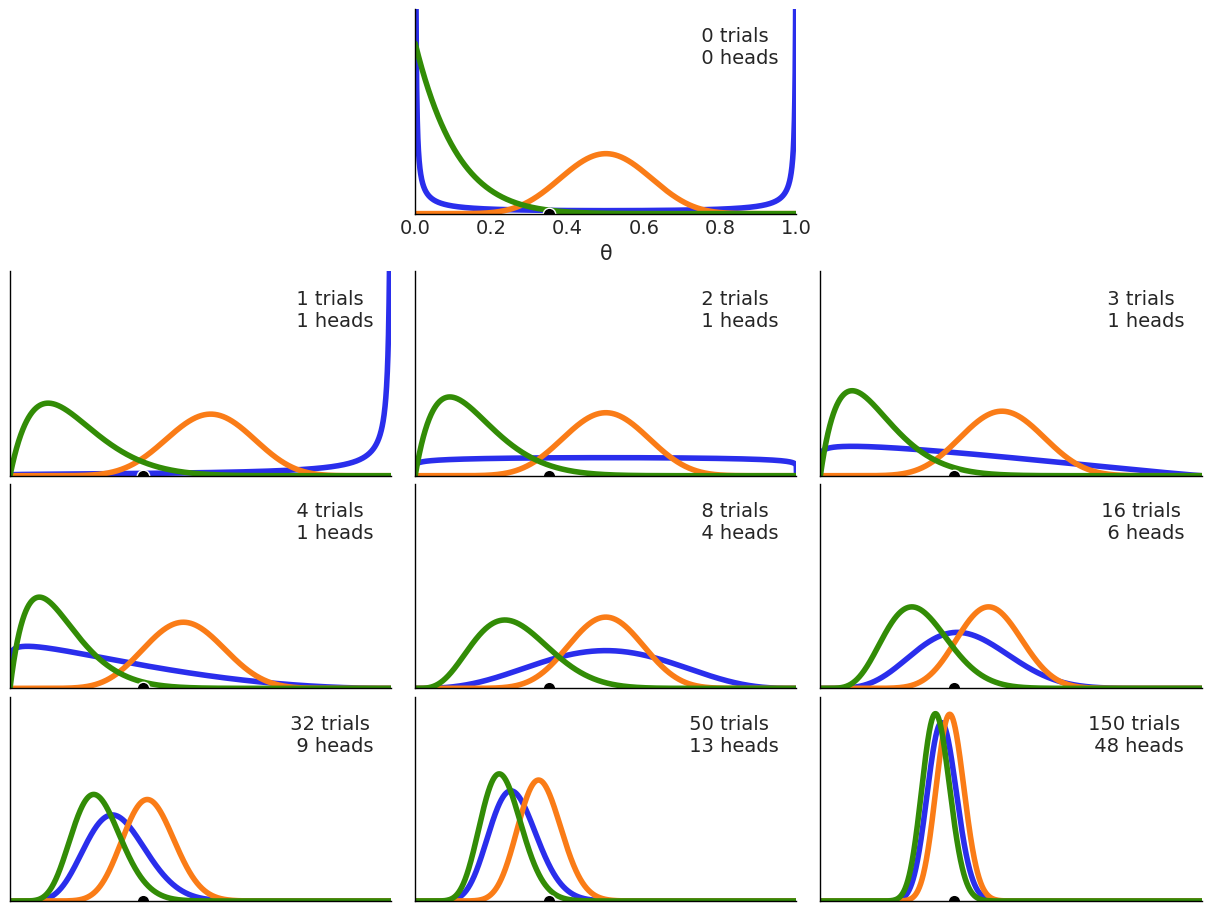

In [15]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(0.1, 0.1), (10, 10), (1, 10)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

And now with different data

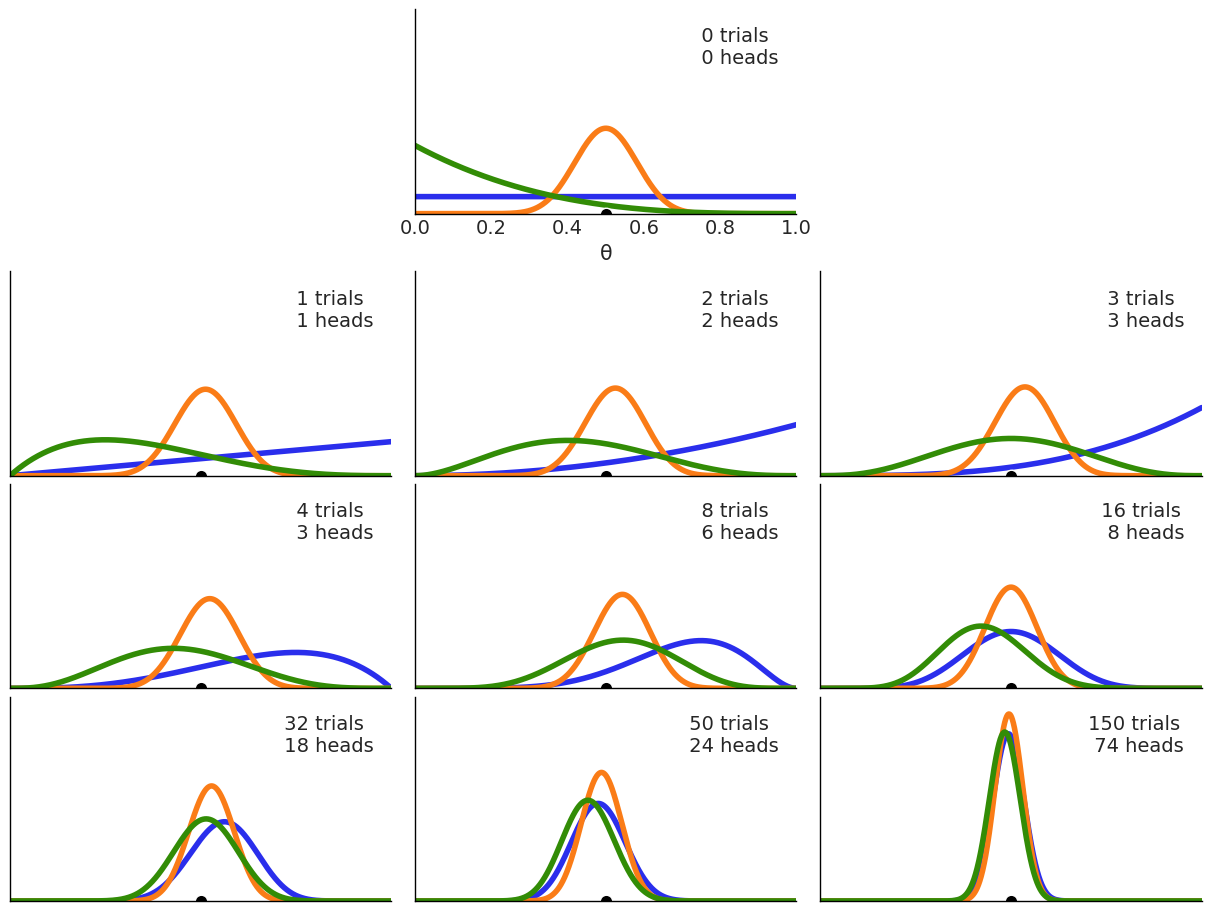

In [16]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [ 0,  1,  2,  3,  3,  6,  8, 18, 24, 74]
theta_real = 0.5

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

## Exercise 14
***

*Read about [Cromwell's rule](https://en.wikipedia.org/wiki/Cromwell%27s_rule) on Wikipedia.*

## Exercise 15
***

*Read about [probabilities and the Dutch book](https://en.wikipedia.org/wiki/Dutch_book) on Wikipedia.*